> ## Formulación del problema

Abstract: Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. Considering morphological features, all the data were modeled with five different machine learning methods: Logistic Regression (LR), Multilayer Perceptrons (MLP), Support Vector Machine (SVM) and Random Forest (RF), and k-Nearest Neighbor (k-NN), which further determined the most successful method for classifying pumpkin seed varieties.

> ## Recolección de datos

#### Link: https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.arff
/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx
/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset_Citation_Request.txt


In [2]:
data = pd.read_excel("/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx",
                    sheet_name="Pumpkin_Seeds_Dataset")
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


> ## Exploración de datos.

In [3]:
data.shape

(2500, 13)

In [4]:
data.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

In [5]:
data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


### Descripción dataset.
* #### Tiene 2500 filas/observaciones y 13 columnas/variables.
* #### 12 columnas son numéricas y 1 es categórica que es la variable objetivo.
* #### No tiene valores nulos ni filas duplicadas.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Análisis de variables

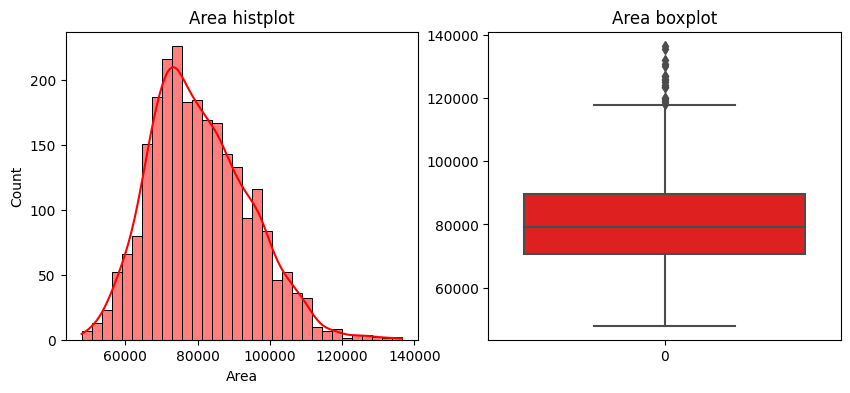

count      2500.000000
mean      80658.220800
std       13664.510228
min       47939.000000
25%       70765.000000
50%       79076.000000
75%       89757.500000
max      136574.000000
Name: Area, dtype: float64


 ------------------------------------------------------------------------------------------ 



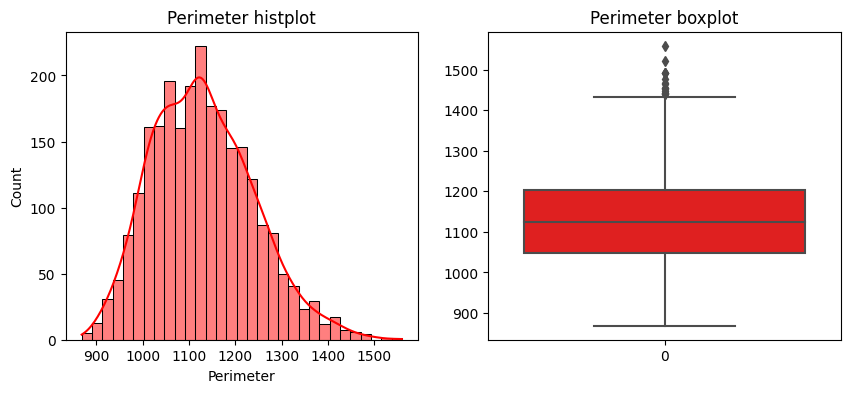

count    2500.000000
mean     1130.279015
std       109.256418
min       868.485000
25%      1048.829750
50%      1123.672000
75%      1203.340500
max      1559.450000
Name: Perimeter, dtype: float64


 ------------------------------------------------------------------------------------------ 



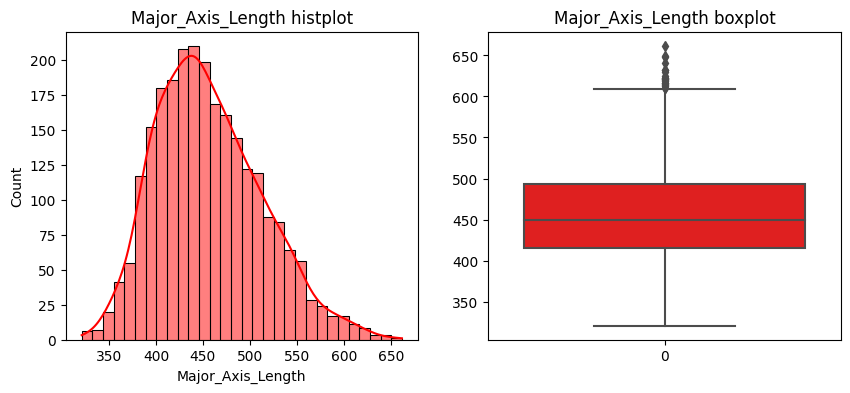

count    2500.000000
mean      456.601840
std        56.235704
min       320.844600
25%       414.957850
50%       449.496600
75%       492.737650
max       661.911300
Name: Major_Axis_Length, dtype: float64


 ------------------------------------------------------------------------------------------ 



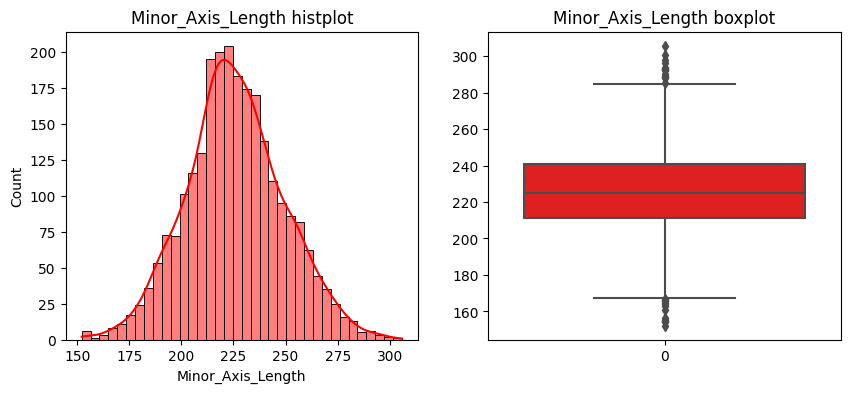

count    2500.000000
mean      225.794921
std        23.297245
min       152.171800
25%       211.245925
50%       224.703100
75%       240.672875
max       305.818000
Name: Minor_Axis_Length, dtype: float64


 ------------------------------------------------------------------------------------------ 



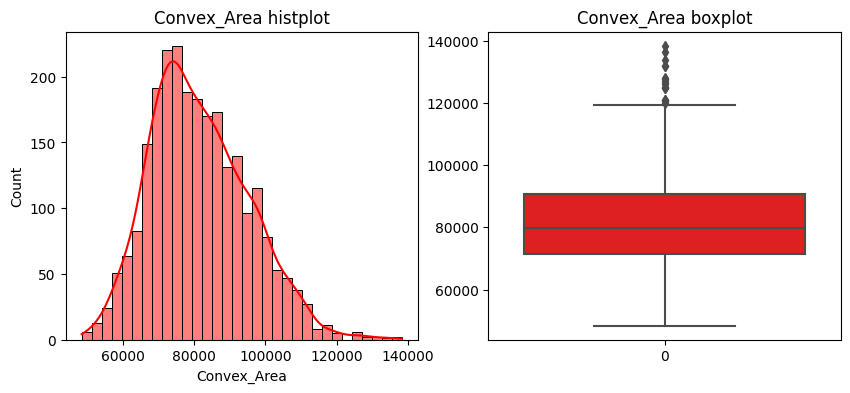

count      2500.000000
mean      81508.084400
std       13764.092788
min       48366.000000
25%       71512.000000
50%       79872.000000
75%       90797.750000
max      138384.000000
Name: Convex_Area, dtype: float64


 ------------------------------------------------------------------------------------------ 



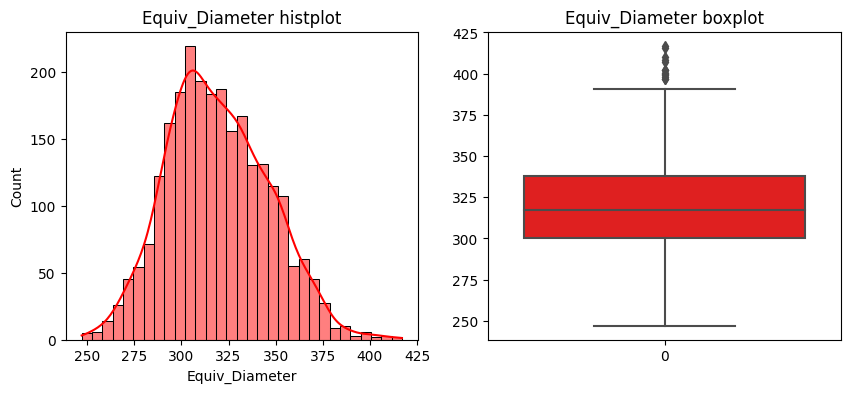

count    2500.000000
mean      319.334230
std        26.891920
min       247.058400
25%       300.167975
50%       317.305350
75%       338.057375
max       417.002900
Name: Equiv_Diameter, dtype: float64


 ------------------------------------------------------------------------------------------ 



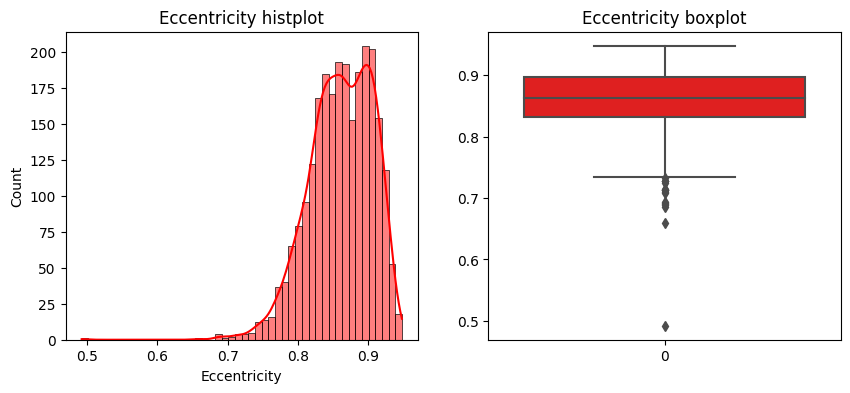

count    2500.000000
mean        0.860879
std         0.045167
min         0.492100
25%         0.831700
50%         0.863700
75%         0.897025
max         0.948100
Name: Eccentricity, dtype: float64


 ------------------------------------------------------------------------------------------ 



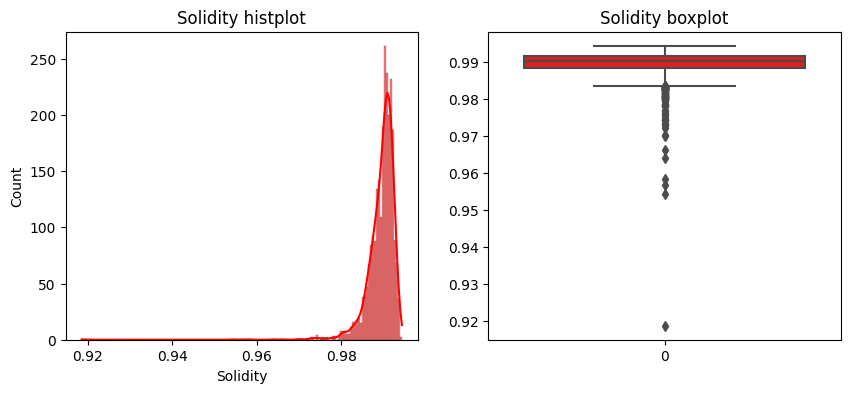

count    2500.000000
mean        0.989492
std         0.003494
min         0.918600
25%         0.988300
50%         0.990300
75%         0.991500
max         0.994400
Name: Solidity, dtype: float64


 ------------------------------------------------------------------------------------------ 



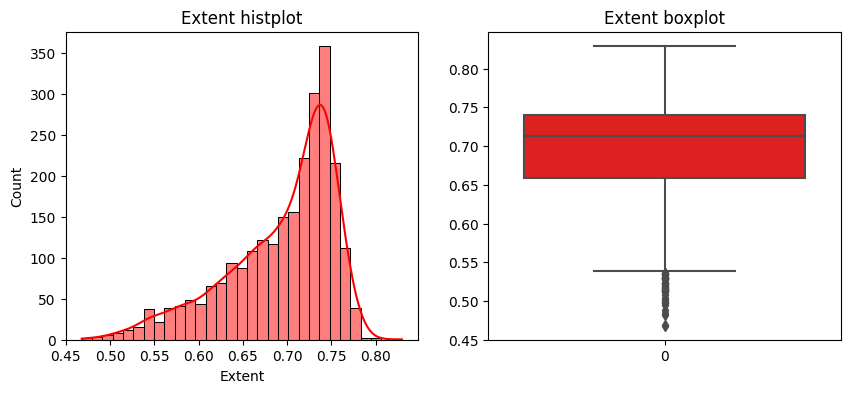

count    2500.000000
mean        0.693205
std         0.060914
min         0.468000
25%         0.658900
50%         0.713050
75%         0.740225
max         0.829600
Name: Extent, dtype: float64


 ------------------------------------------------------------------------------------------ 



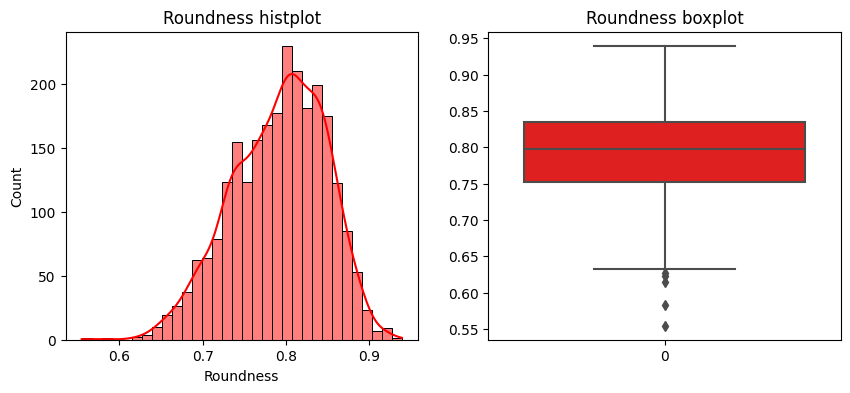

count    2500.000000
mean        0.791533
std         0.055924
min         0.554600
25%         0.751900
50%         0.797750
75%         0.834325
max         0.939600
Name: Roundness, dtype: float64


 ------------------------------------------------------------------------------------------ 



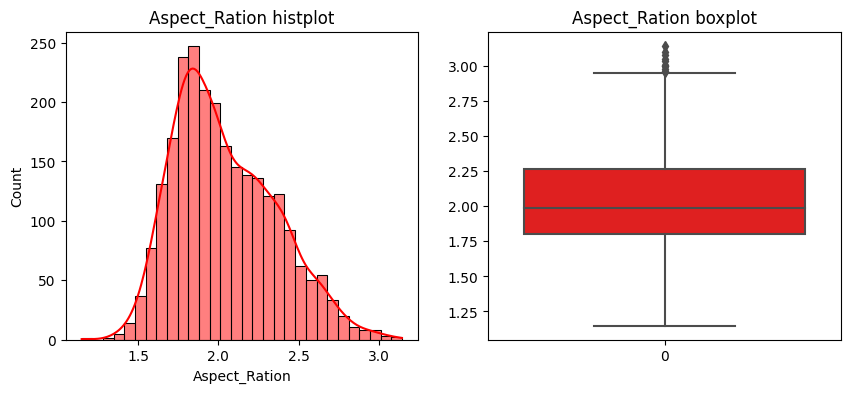

count    2500.000000
mean        2.041702
std         0.315997
min         1.148700
25%         1.801050
50%         1.984200
75%         2.262075
max         3.144400
Name: Aspect_Ration, dtype: float64


 ------------------------------------------------------------------------------------------ 



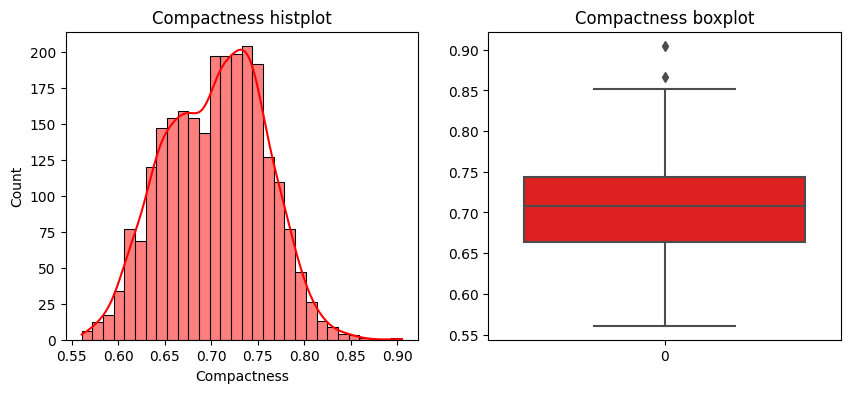

count    2500.000000
mean        0.704121
std         0.053067
min         0.560800
25%         0.663475
50%         0.707700
75%         0.743500
max         0.904900
Name: Compactness, dtype: float64


 ------------------------------------------------------------------------------------------ 



In [9]:
for col in data.columns.drop("Class"):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, color="r")
    plt.title(col+" histplot")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col], color="r")
    plt.title(col+" boxplot" )
    
    plt.show()

    print()
    display(data[col].describe())
    print("\n","-"*90,"\n")

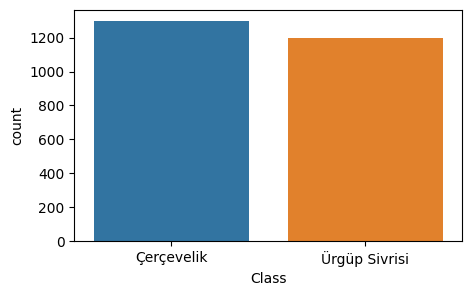

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Class,,,,,,,,,,,,
Çerçevelik,78423.154615,1089.522488,426.272615,234.776929,79286.488462,315.193332,0.830538,0.989080,0.707018,0.827499,1.822609,0.741163
Ürgüp Sivrisi,83079.542500,1174.431919,489.458501,216.064413,83914.813333,323.820202,0.893749,0.989938,0.678240,0.752570,2.279054,0.663991


In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["Class"])
plt.show()
display(data["Class"].value_counts())
print()
display(data.groupby("Class").mean())

> ## Preprocesado de datos.
* #### Convertir la variable objetivo, que es una variable categórica, en una variable binaria.

In [11]:
data_cp = data.copy()

In [12]:
data_cp["Class"].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [13]:
data_cp["Class"] = data_cp["Class"].replace({"Çerçevelik":0 ,"Ürgüp Sivrisi":1})

In [14]:
display(data_cp.head())
print()
display(data_cp["Class"].value_counts())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


0    1300
1    1200
Name: Class, dtype: int64

> ## Construcción del modelo.

> ## Regresión logística.



### Modelo con todas las variables.
* #### División de datos en datos de entrenamiento y en datos de prueba 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
data_lr = data_cp.copy()

In [17]:
X = data_lr.drop(["Class"], axis=1)
Y = data_lr["Class"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [19]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

* #### Evaluación del modelo

In [20]:
lr.score(x_test, y_test)

0.8466666666666667

* #### Validación cruzada.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(LogisticRegression(),
                         X,Y,
                         scoring="accuracy",
                         cv=10)
print(scores)
print("\n","Score de la validación cruzada: ",scores.mean())

[0.876 0.904 0.884 0.904 0.908 0.884 0.816 0.856 0.872 0.856]

 Score de la validación cruzada:  0.876


### Modelos con selección de variables.
* #### Selección de rasgos y validación cruzada.

In [23]:
from sklearn.feature_selection import RFE

In [24]:
lr = LogisticRegression(solver="liblinear")

In [25]:
for i in reversed(range(1,12)):
    rfe = RFE(lr, n_features_to_select=i)
    rfe = rfe.fit(X,Y)
    
    var_select = pd.DataFrame(list(zip(X, rfe.support_, rfe.ranking_)), columns=["variable", "support", "ranking"])
    
    print("Modelo de regresión logística con ", i, " variables")
    display(var_select)
    
    X_new = data_lr[var_select[var_select["ranking"]==1]["variable"].unique()]
    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=0)
    
    lr = LogisticRegression(solver="liblinear")
    lr.fit(x_train, y_train)
    score = lr.score(x_test, y_test)
    print("Score del modelo con ", i," variables",":",score)
    scores = cross_val_score(LogisticRegression(),
                         X_new,Y,
                         scoring="accuracy",
                         cv=10)
    
    print("Score de la validación cruzada: ",scores.mean())
    
    print("\n","-"*40,"\n")

Modelo de regresión logística con  11  variables


,variable,support,ranking
0,Area,True,1
1,Perimeter,True,1
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,True,1
4,Convex_Area,False,2
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,True,1
9,Roundness,True,1


Score del modelo con  11  variables : 0.8453333333333334
Score de la validación cruzada:  0.8692

 ---------------------------------------- 

Modelo de regresión logística con  10  variables


,variable,support,ranking
0,Area,False,2
1,Perimeter,True,1
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,True,1
4,Convex_Area,False,3
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,True,1
9,Roundness,True,1


Score del modelo con  10  variables : 0.848
Score de la validación cruzada:  0.8684000000000001

 ---------------------------------------- 

Modelo de regresión logística con  9  variables


,variable,support,ranking
0,Area,False,3
1,Perimeter,False,2
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,True,1
4,Convex_Area,False,4
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,True,1
9,Roundness,True,1


Score del modelo con  9  variables : 0.8426666666666667
Score de la validación cruzada:  0.8656

 ---------------------------------------- 

Modelo de regresión logística con  8  variables


,variable,support,ranking
0,Area,False,4
1,Perimeter,False,3
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,True,1
4,Convex_Area,False,5
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,False,2
9,Roundness,True,1


Score del modelo con  8  variables : 0.8453333333333334
Score de la validación cruzada:  0.866

 ---------------------------------------- 

Modelo de regresión logística con  7  variables


,variable,support,ranking
0,Area,False,5
1,Perimeter,False,4
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,True,1
4,Convex_Area,False,6
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,False,3
9,Roundness,False,2


Score del modelo con  7  variables : 0.8453333333333334
Score de la validación cruzada:  0.866

 ---------------------------------------- 

Modelo de regresión logística con  6  variables


,variable,support,ranking
0,Area,False,6
1,Perimeter,False,5
2,Major_Axis_Length,True,1
3,Minor_Axis_Length,False,2
4,Convex_Area,False,7
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,False,4
9,Roundness,False,3


Score del modelo con  6  variables : 0.844
Score de la validación cruzada:  0.8688

 ---------------------------------------- 

Modelo de regresión logística con  5  variables


,variable,support,ranking
0,Area,False,7
1,Perimeter,False,6
2,Major_Axis_Length,False,2
3,Minor_Axis_Length,False,3
4,Convex_Area,False,8
5,Equiv_Diameter,True,1
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,False,5
9,Roundness,False,4


Score del modelo con  5  variables : 0.848
Score de la validación cruzada:  0.8667999999999999

 ---------------------------------------- 

Modelo de regresión logística con  4  variables


,variable,support,ranking
0,Area,False,8
1,Perimeter,False,7
2,Major_Axis_Length,False,3
3,Minor_Axis_Length,False,4
4,Convex_Area,False,9
5,Equiv_Diameter,False,2
6,Eccentricity,True,1
7,Solidity,True,1
8,Extent,False,6
9,Roundness,False,5


Score del modelo con  4  variables : 0.8466666666666667
Score de la validación cruzada:  0.8664

 ---------------------------------------- 

Modelo de regresión logística con  3  variables


,variable,support,ranking
0,Area,False,9
1,Perimeter,False,8
2,Major_Axis_Length,False,4
3,Minor_Axis_Length,False,5
4,Convex_Area,False,10
5,Equiv_Diameter,False,3
6,Eccentricity,False,2
7,Solidity,True,1
8,Extent,False,7
9,Roundness,False,6


Score del modelo con  3  variables : 0.8466666666666667
Score de la validación cruzada:  0.8672000000000001

 ---------------------------------------- 

Modelo de regresión logística con  2  variables


,variable,support,ranking
0,Area,False,10
1,Perimeter,False,9
2,Major_Axis_Length,False,5
3,Minor_Axis_Length,False,6
4,Convex_Area,False,11
5,Equiv_Diameter,False,4
6,Eccentricity,False,3
7,Solidity,False,2
8,Extent,False,8
9,Roundness,False,7


Score del modelo con  2  variables : 0.848
Score de la validación cruzada:  0.8664

 ---------------------------------------- 

Modelo de regresión logística con  1  variables


,variable,support,ranking
0,Area,False,11
1,Perimeter,False,10
2,Major_Axis_Length,False,6
3,Minor_Axis_Length,False,7
4,Convex_Area,False,12
5,Equiv_Diameter,False,5
6,Eccentricity,False,4
7,Solidity,False,3
8,Extent,False,9
9,Roundness,False,8


Score del modelo con  1  variables : 0.8453333333333334
Score de la validación cruzada:  0.8648

 ---------------------------------------- 



#### El modelo realizado con todas las variables independientes (12) es el que mayor score tiene en su validación cruzada con un 87,6% de coincidencia entre los valores predecidos y los valores actuales.

### Evaluación del modelo.

In [26]:
from sklearn import metrics

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [28]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
probs = lr.predict_proba(x_test)
probs

array([[0.61392984, 0.38607016],
       [0.04863854, 0.95136146],
       [0.32935511, 0.67064489],
       ...,
       [0.00707216, 0.99292784],
       [0.4859439 , 0.5140561 ],
       [0.69083474, 0.30916526]])

In [30]:
prob = probs[:,1]
threshold = 0.5
prob_df = pd.DataFrame(prob)
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.386070,0,0
1,0.951361,1,1
2,0.670645,1,1
3,0.256595,0,0
4,0.369139,0,0


In [31]:
print("El "+str(metrics.accuracy_score(y_test, prob_df["prediction"])*100)+" % de los casos coinciden")

El 84.66666666666667 % de los casos coinciden


In [32]:
prob_df["prediction"].value_counts()

0    402
1    348
Name: prediction, dtype: int64

In [33]:
print("Probabilidad de ser Ürgüp Sivrisi "+str(float(prob_df["prediction"].value_counts()[1]/len(prob_df)))+"%")

Probabilidad de ser Ürgüp Sivrisi 0.464%


### Matrices de confusión y curvas ROC.

In [34]:
threshold = [0.04, 0.05, 0.08, 0.10, 0.12, 0.18, 0.20, 0.25, 0.30, 0.40]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"] = list(y_test)
    
    confusion_matrix = pd.crosstab(prob_df["prediction"],
                                  prob_df["actual"])
    
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-(TN/(TN+FP))
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [35]:
sensitivities

[1,
 0.9806094182825484,
 0.9750692520775623,
 0.961218836565097,
 0.9501385041551247,
 0.9390581717451524,
 0.9113573407202216,
 0.9085872576177285,
 0.8947368421052632,
 0.8781163434903048,
 0.850415512465374,
 0]

In [36]:
especifities_1

[1,
 0.6966580976863753,
 0.6580976863753214,
 0.5681233933161953,
 0.506426735218509,
 0.4601542416452442,
 0.3650385604113111,
 0.3316195372750642,
 0.2930591259640103,
 0.2467866323907455,
 0.17223650385604117,
 0]

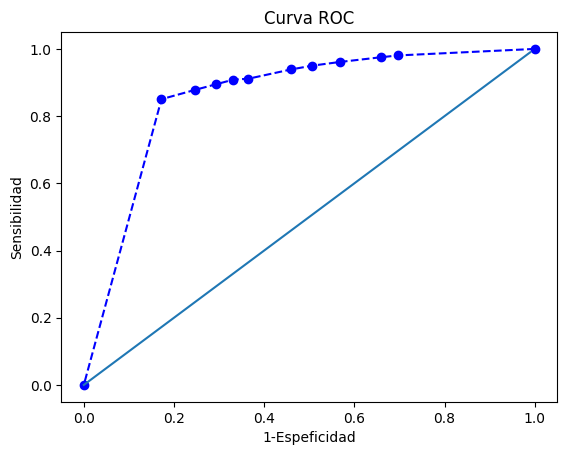

In [37]:
plt.plot(especifities_1,sensitivities,marker="o",
        linestyle="--",color="b")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Espeficidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()

> ## Árbol de decisión.

### Encontrar el mejor valor de máxima profundidad para el árbol.

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [39]:
data_tree = data.copy()
X = data_tree.drop(["Class"], axis=1)
Y = data_tree["Class"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [41]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)
    tree.fit(x_train,y_train)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    score = np.mean(cross_val_score(tree,
                                   X,Y,
                                   scoring="accuracy",
                                   cv=cv))
    print("Score para i = ",i," es de ",score)
    print("Orden de importancia de los atributos:")
    df_importance = pd.DataFrame(list(zip(X.columns,tree.feature_importances_)), columns=["Variable", "Order"]) 
    display(df_importance.sort_values("Order", ascending=False))
    print("\n","-"*60,"\n")

Score para i =  1  es de  0.8572000000000001
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,1.0
0,Area,0.0
1,Perimeter,0.0
2,Major_Axis_Length,0.0
3,Minor_Axis_Length,0.0
4,Convex_Area,0.0
5,Equiv_Diameter,0.0
7,Solidity,0.0
8,Extent,0.0
9,Roundness,0.0



 ------------------------------------------------------------ 

Score para i =  2  es de  0.8572000000000001
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.847544
10,Aspect_Ration,0.079298
11,Compactness,0.073158
0,Area,0.000000
1,Perimeter,0.000000
2,Major_Axis_Length,0.000000
3,Minor_Axis_Length,0.000000
4,Convex_Area,0.000000
5,Equiv_Diameter,0.000000
7,Solidity,0.000000



 ------------------------------------------------------------ 

Score para i =  3  es de  0.8583999999999999
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.775496
10,Aspect_Ration,0.072557
7,Solidity,0.068446
11,Compactness,0.066939
0,Area,0.016562
1,Perimeter,0.000000
2,Major_Axis_Length,0.000000
3,Minor_Axis_Length,0.000000
4,Convex_Area,0.000000
5,Equiv_Diameter,0.000000



 ------------------------------------------------------------ 

Score para i =  4  es de  0.876
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.724059
11,Compactness,0.084178
7,Solidity,0.068454
10,Aspect_Ration,0.067745
4,Convex_Area,0.028501
0,Area,0.016416
1,Perimeter,0.007999
9,Roundness,0.002649
2,Major_Axis_Length,0.000000
3,Minor_Axis_Length,0.000000



 ------------------------------------------------------------ 

Score para i =  5  es de  0.8688
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.682666
11,Compactness,0.087215
7,Solidity,0.075533
10,Aspect_Ration,0.063872
0,Area,0.035312
2,Major_Axis_Length,0.017147
4,Convex_Area,0.014579
9,Roundness,0.012271
1,Perimeter,0.008014
3,Minor_Axis_Length,0.003391



 ------------------------------------------------------------ 

Score para i =  6  es de  0.8720000000000001
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.652055
11,Compactness,0.086188
7,Solidity,0.081002
10,Aspect_Ration,0.074462
0,Area,0.047654
3,Minor_Axis_Length,0.017531
9,Roundness,0.013242
8,Extent,0.008984
2,Major_Axis_Length,0.007885
1,Perimeter,0.007655



 ------------------------------------------------------------ 

Score para i =  7  es de  0.874
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.622830
11,Compactness,0.089029
7,Solidity,0.082057
10,Aspect_Ration,0.067163
9,Roundness,0.028120
4,Convex_Area,0.027381
0,Area,0.025348
8,Extent,0.018797
2,Major_Axis_Length,0.017653
3,Minor_Axis_Length,0.014396



 ------------------------------------------------------------ 

Score para i =  8  es de  0.8751999999999999
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.601598
7,Solidity,0.088495
11,Compactness,0.087043
10,Aspect_Ration,0.057647
9,Roundness,0.041598
4,Convex_Area,0.039233
3,Minor_Axis_Length,0.021230
2,Major_Axis_Length,0.020014
8,Extent,0.018176
0,Area,0.013217



 ------------------------------------------------------------ 

Score para i =  9  es de  0.8703999999999998
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.572603
11,Compactness,0.092043
7,Solidity,0.085585
10,Aspect_Ration,0.060610
9,Roundness,0.044376
8,Extent,0.030160
0,Area,0.023880
2,Major_Axis_Length,0.021615
1,Perimeter,0.019182
5,Equiv_Diameter,0.017612



 ------------------------------------------------------------ 

Score para i =  10  es de  0.8640000000000001
Orden de importancia de los atributos:


,Variable,Order
6,Eccentricity,0.547098
7,Solidity,0.092005
11,Compactness,0.088800
10,Aspect_Ration,0.075781
9,Roundness,0.042982
3,Minor_Axis_Length,0.031879
8,Extent,0.025527
1,Perimeter,0.024098
2,Major_Axis_Length,0.023743
4,Convex_Area,0.016959



 ------------------------------------------------------------ 



* #### Para profundidad igual a 4 alcanza la mayor puntuación.
* #### El atributo que será el nodo raíz es "Eccentricity" ya que es el que mayor importancia tiene.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [43]:
tree_clf = DecisionTreeClassifier(criterion="entropy",
                             max_depth=4,
                             random_state=0)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [44]:
df_importance = pd.DataFrame(list(zip(x_train.columns,tree_clf.feature_importances_)), columns=["Variable", "Order"]) 
display(df_importance.sort_values("Order", ascending=False))

,Variable,Order
6,Eccentricity,0.724059
11,Compactness,0.084178
7,Solidity,0.068454
10,Aspect_Ration,0.067745
4,Convex_Area,0.028501
0,Area,0.016416
1,Perimeter,0.007999
9,Roundness,0.002649
2,Major_Axis_Length,0.000000
3,Minor_Axis_Length,0.000000


In [45]:
preds = tree_clf.predict(x_test)

### Evaluar el modelo

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
crosstab_pred = pd.crosstab(y_test,preds, rownames=["Actual"], colnames=["Predictions"])
crosstab_pred

Predictions,Çerçevelik,Ürgüp Sivrisi
Actual,,
Çerçevelik,336,53
Ürgüp Sivrisi,58,303


In [48]:
crosstab_pred.astype("float").div(crosstab_pred.sum(axis=1), axis=0)

Predictions,Çerçevelik,Ürgüp Sivrisi
Actual,,
Çerçevelik,0.863753,0.136247
Ürgüp Sivrisi,0.160665,0.839335


In [49]:
accuracy_score(y_test, preds)

0.852

* #### Un 86,3% de la clase "Çerçevelik" está bien clasificada y un 83,9% de "Ürgüp Sivrisi" está bien clasificada.

In [50]:
from sklearn.tree import plot_tree

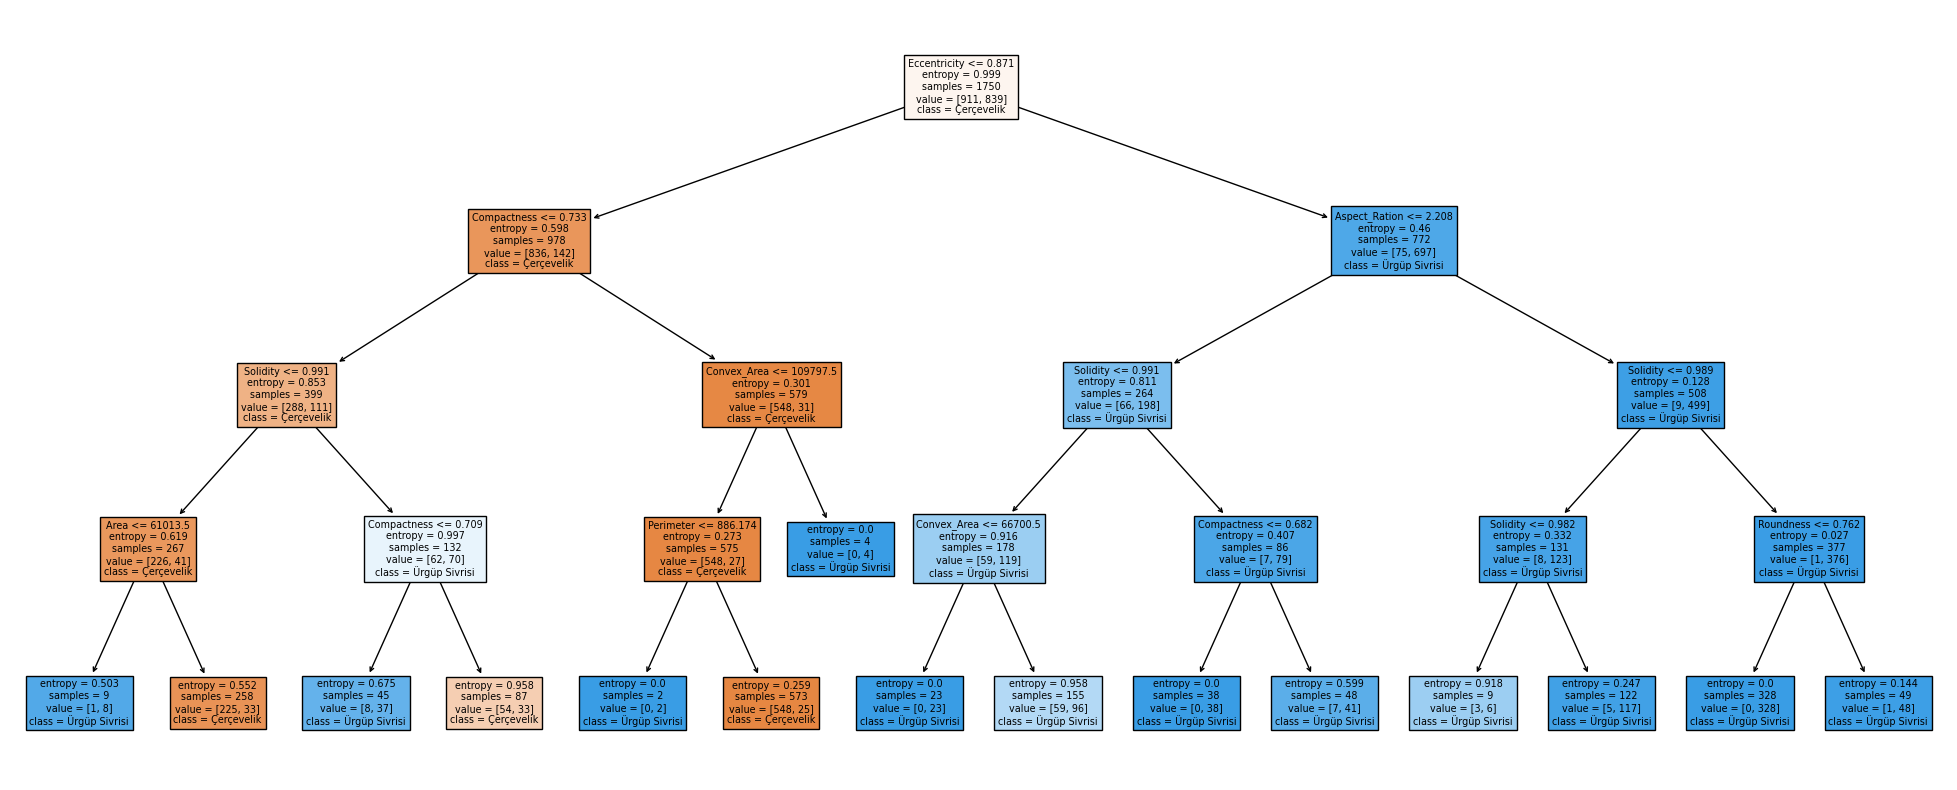

In [51]:
plt.figure(figsize=(25,10))
plot_tree(tree_clf,
          feature_names=x_test.columns,
          filled=True,
         class_names = ["Çerçevelik","Ürgüp Sivrisi"])
plt.show()

> ## Bosque aleatorio

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
y_train = y_train.replace({"Çerçevelik":0, "Ürgüp Sivrisi":1})

In [54]:
forest = RandomForestClassifier(n_jobs=True, oob_score=True, n_estimators=100, random_state=0)
forest = forest.fit(x_train, y_train)

In [55]:
forest.oob_score_

0.8914285714285715

* #### El bosque aleatorio con un total de 100 árboles nos da un score o una precisión en la predicción de 89%